In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
house=pd.read_csv('C:\\Users\\Tia Phan\\OneDrive\\Máy tính\\a\\Dataset\\kc_house_data.csv')

In [10]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
new_house=house.drop(['id','zipcode','date'],axis='columns')

In [20]:
new_house.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
Name: price, dtype: float64

<AxesSubplot:>

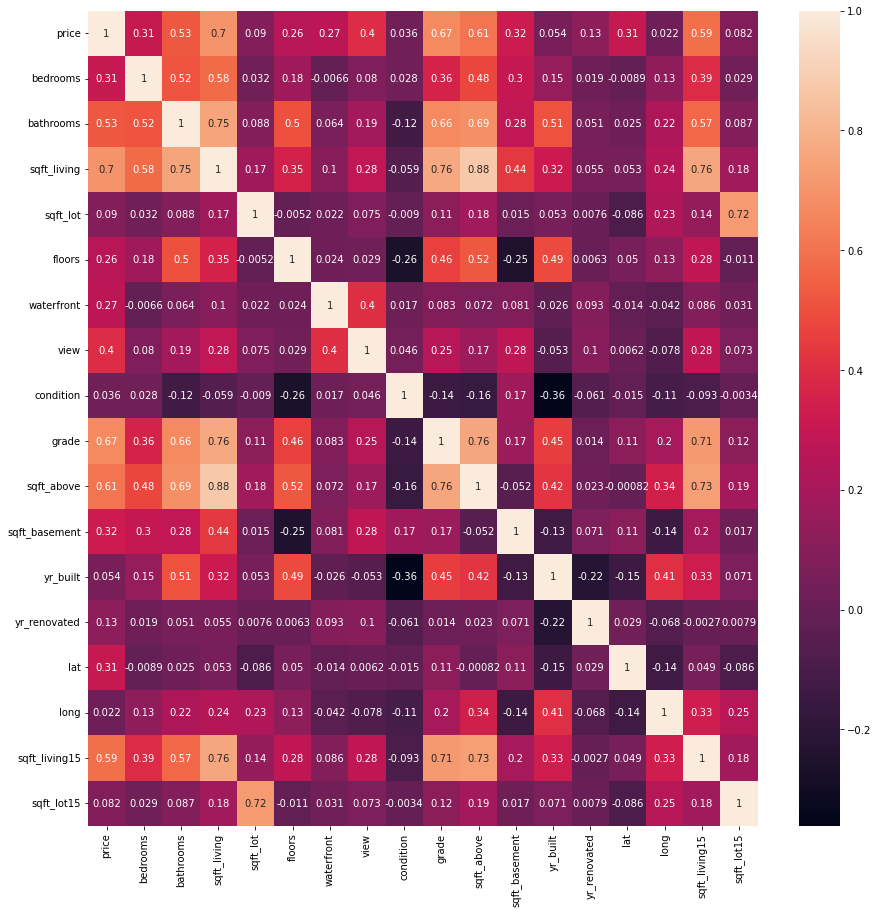

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(new_house.corr(),annot=True)

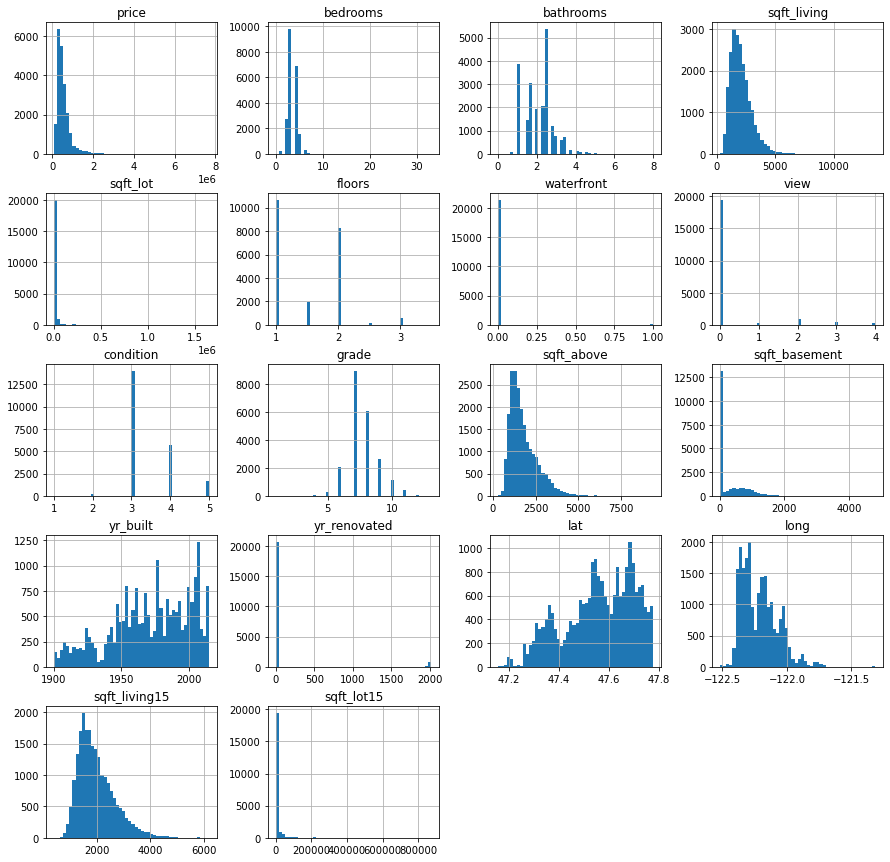

In [23]:
new_house.hist(bins=50,figsize=(15,15))
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.linear_model import LinearRegression

In [46]:
X=new_house.drop(['price'],axis=1)
y=new_house['price']

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# LINEAR REGRESSION

In [51]:
rer=LinearRegression()


In [52]:
rer.fit(X_train,y_train)

LinearRegression()

In [53]:
rer.score(X_test,y_test)

0.6957401566330477

In [61]:
prediction1=rer.predict(X_test)

In [55]:
rer.score(X_train,y_train)

0.6951124246806972

In [59]:
pd.DataFrame({'Actual':y_test,'Prediction':prediction})

,Actual,Prediction
735,365000.0,4.665927e+05
2830,865000.0,7.763181e+05
4106,1040000.0,1.213287e+06
16218,1490000.0,1.638677e+06
19964,711000.0,7.324068e+05
...,...,...
13674,338000.0,5.003238e+05
20377,673000.0,6.098090e+05
8805,285000.0,3.905410e+05
10168,605000.0,5.937681e+05


##  R squared error

In [63]:
score2=metrics.r2_score(y_test,prediction1)

## Mean absolute error

In [65]:
from sklearn.metrics import mean_absolute_error

In [67]:
score3=metrics.mean_absolute_error(y_test,prediction1)

In [68]:
print("R squared error:",score2)
print("Mean absolute error:",score3)

R squared error: 0.6957401566330477
Mean absolute error: 128272.92632625817


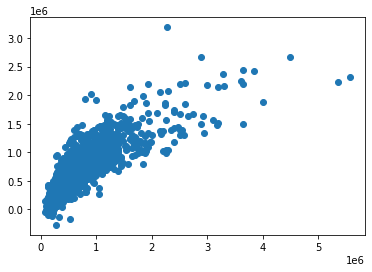

In [69]:
plt.scatter(y_test,prediction1)

# RIDGE

In [61]:
from sklearn.linear_model import Ridge

In [62]:
rg=Ridge(alpha=0.03)

In [63]:
rg.fit(X_train,y_train)

Ridge(alpha=0.03)

In [64]:
rg.score(X_test,y_test)

0.6957383274704816

In [65]:
rg.score(X_train,y_train)

0.6951124229994273

In [71]:
prediction2=rg.predict(X_test)

## R SQUARED ERROR

In [75]:
score4=metrics.r2_score(y_test,prediction2)

## MEAN ABSOLUTE ERROR

In [76]:
score5=metrics.mean_absolute_error(y_test, prediction2)

In [77]:
print("R-squared error:",score4)
print("Mean absolute error:",score5)

R-squared error: 0.6957383274704816
Mean absolute error: 128272.85746086287


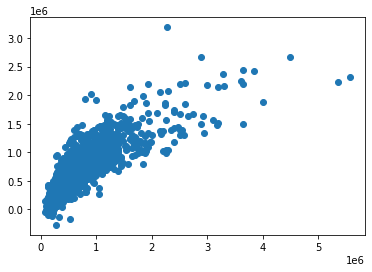

In [78]:
plt.scatter(y_test,prediction2)

## LASSO

In [66]:
from sklearn.linear_model import Lasso

In [67]:
ls=Lasso(alpha=0.01)

In [68]:
ls.fit(X_train,y_train)

C:\Users\Tia Phan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312815078266763.9, tolerance: 226187505648.62097
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [69]:
ls.score(X_test,y_test)

0.6957401296399557

In [80]:
prediction3=ls.predict(X_test)

## R SQUARED ERROR 

In [81]:
score5=metrics.r2_score(y_test,prediction3)

## MEAN ABSOLUTE ERROR

In [82]:
score6=metrics.mean_absolute_error(y_test, prediction3)

In [83]:
print("R-squared error:",score5)
print("Mean absolute error:",score6)

R-squared error: 0.6957401296399557
Mean absolute error: 128272.9247968897


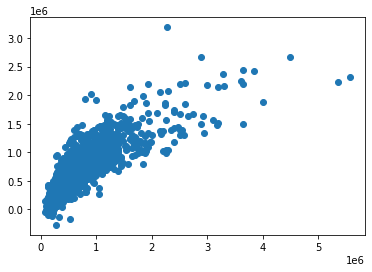

In [84]:
plt.scatter(y_test,prediction3)

# XG BOOST

In [33]:
from sklearn import metrics

In [36]:
!pip install xgboost

In [37]:
from xgboost import XGBRegressor

In [38]:
xg=XGBRegressor()

In [39]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Train data using the XGBoost model

# Predict

In [47]:
xg_prediction=xg.predict(X_test)

Since the X_train dataset doesn't have house price, so we have to predict the house price of this dataset.

There are two ways to check for the accuracy of numeric data: R-squared error and Mean absolute error

# R-squared Error

In [48]:
score=metrics.r2_score(y_test,xg_prediction)

See the difference in value between the actual price(y_train) and predicted price(xg_prediction)

# Mean absolute error

In [49]:
score_1=metrics.mean_absolute_error(y_test,xg_prediction)

In [50]:
print("R-squared error:",score)
print("Mean absolute error:",score_1)

R-squared error: 0.8685122892210491
Mean absolute error: 72158.40052119477


In [54]:
prediction=xg.predict(X_train)

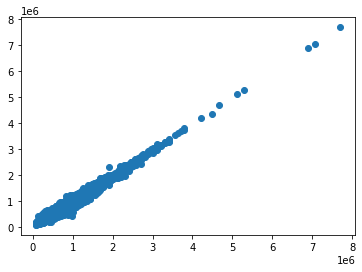

In [56]:
plt.scatter(y_train,prediction)